In [1]:
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

import math  
import numpy as np
import pandas as pd

import missingno as msno

In [2]:
df = pd.read_csv('datasets/world_development_indicators.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,ARG,People with basic handwashing facilities inclu...,SH.STA.HYGN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,People using at least basic sanitation service...,SH.STA.BASS.ZS,9.262178e+01,9.318250e+01,9.374175e+01,9.416756e+01,9.420105e+01,9.423485e+01,9.425851e+01,NaN,NaN,NaN
2,Argentina,ARG,People using safely managed sanitation service...,SH.STA.SMSS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,"International tourism, number of arrivals",ST.INT.ARVL,6.800000e+06,6.703000e+06,6.497000e+06,6.510000e+06,7.165000e+06,6.816000e+06,6.668000e+06,6711000.0,6942000.0,NaN
4,Argentina,ARG,"International tourism, number of departures",ST.INT.DPRT,5.307000e+06,6.686000e+06,7.266000e+06,6.746000e+06,6.517000e+06,7.807000e+06,1.041700e+07,12213000.0,11130000.0,NaN


In [3]:
len(df['Country Name'].unique())

267

In [4]:
df.replace('United States', 'US', inplace = True)
df.replace('Korea, Rep.', 'Korea, South', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Bahamas, The', 'Bahamas', inplace = True)
df.replace('Myanmar', 'Burma', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Czech Republic', 'Czechia', inplace = True)
df.replace('Syrian Arab Republic', 'Syria', inplace = True)
df.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis', inplace = True)
df.replace('St. Lucia', 'Saint Lucia', inplace = True)
df.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines', inplace = True)
df.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace = True)
df.replace('Lao PDR', 'Laos', inplace = True)
df.replace('Slovak Republic', 'Slovakia', inplace = True)
df.replace('Gambia, The', 'Gambia', inplace = True)
df.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)', inplace = True)
df.replace('Congo, Rep.', 'Congo (Brazzaville)', inplace = True)
df.replace('Brunei Darussalam', 'Brunei', inplace = True)


In [5]:
df_covid_con = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_covid_fat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [6]:
df_covid_con = df_covid_con.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_fat = df_covid_fat.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_rec = df_covid_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

df_covid_con.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
180,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,237,254,261,263,263,267,268,290,308,308
181,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,6
182,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
183,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,...,39,39,39,39,39,40,40,43,45,45
184,Zimbabwe,-20.000000,30.000000,0,0,0,0,0,0,0,...,9,10,11,11,11,13,14,14,17,17


In [7]:
dates = df_covid_con.columns[4:]
df_covid_con = df_covid_con.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')
df_covid_fat = df_covid_fat.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')
df_covid_rec = df_covid_rec.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')


In [8]:
df_covid_rec.head()

,Country/Region,Lat,Long,Date,Recovered
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [9]:
df_covid_con['Date'] =pd.to_datetime(df_covid_con.Date)
df_covid_fat['Date'] =pd.to_datetime(df_covid_fat.Date)
df_covid_rec['Date'] =pd.to_datetime(df_covid_rec.Date)

In [10]:
# df_covid = df_covid.groupby('Date')['Confirmed'].sum().reset_index()

In [11]:
df_covid_rec.tail()

,Country/Region,Lat,Long,Date,Recovered
15350,West Bank and Gaza,31.952200,35.233200,2020-04-14,62
15351,Western Sahara,24.215500,-12.885800,2020-04-14,0
15352,Yemen,15.552727,48.516388,2020-04-14,0
15353,Zambia,-15.416700,28.283300,2020-04-14,30
15354,Zimbabwe,-20.000000,30.000000,2020-04-14,0


In [12]:
df_covid = df_covid_con.merge(df_covid_fat, 
               on=['Country/Region', 'Lat', 'Long', 'Date']).merge(df_covid_rec, 
                                                                   on=['Country/Region', 'Lat', 'Long', 'Date'])

In [13]:
df_covid.tail()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
14769,West Bank and Gaza,31.952200,35.233200,2020-04-14,308,2,62
14770,Western Sahara,24.215500,-12.885800,2020-04-14,6,0,0
14771,Yemen,15.552727,48.516388,2020-04-14,1,0,0
14772,Zambia,-15.416700,28.283300,2020-04-14,45,2,30
14773,Zimbabwe,-20.000000,30.000000,2020-04-14,17,3,0


In [14]:
common = set(df_covid['Country/Region'].unique()).intersection(set(df['Country Name'].unique()))

In [15]:
set(df_covid['Country/Region'].unique()) - common

{'Diamond Princess',
 'Holy See',
 'MS Zaandam',
 'Taiwan*',
 'Western Sahara',
 'Yemen'}

In [16]:
# set(df['Country Name'].unique()) - common

In [17]:
lol = []
cols = []
for country in common:
    temp = df[df['Country Name'] == country].reset_index()
    temp_vals = temp[df.columns[4:]]
    temp['Latest'] = temp_vals.ffill(axis=1).iloc[:, -1]
    t= temp[['Country Name', 'Series Name', 'Latest']].pivot(index='Country Name', 
                                                          columns='Series Name', values='Latest').reset_index()
    cols = list(t.columns)
    lol.append(list(t.loc[0]))
    

In [18]:
# cols
cols = [
    'Country Name',
    'Birth rate (per 1,000)',
    'Death, by communicable diseases and others (%)',
    'Death, by non-communicable diseases (%)',
    'Health expenditure per capita, PPP ($)',
    'Death rate (per 1,000)',
    'Hospital beds (per 1,000)',
    'International tourism, number of arrivals',
    'International tourism, number of departures',
    'Life expectancy at birth (years)',
    'Mortality rate, adult, female (per 1,000)',
    'Mortality rate, adult, male (per 1,000)',
    'Nurses and midwives (per 1,000)',
    'People using at least basic sanitation services (%)',
    'People using safely managed sanitation services (%)',
    'People with basic handwashing facilities (%)',
    'Population ages 65+ (%)',
    'Population density (people per sq.km)',
    'Population',
    'Smoking prevalence (ages 15+)'
]

In [19]:
df_wdi = pd.DataFrame(lol, columns = cols)
df_wdi.head()

,Country Name,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals","International tourism, number of departures",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)","Mortality rate, adult, male (per 1,000)","Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),People using safely managed sanitation services (%),People with basic handwashing facilities (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+)
0,Hungary,9.700,1.8,93.8,1963.162630,13.500,7.0,17552000.0,8649000.0,76.063415,80.586,168.058,6.6425,97.990873,95.678748,NaN,19.157725,107.906606,9768785.0,30.6
1,Colombia,15.098,10.1,74.8,829.802922,5.503,1.5,3904000.0,4368000.0,76.925000,87.205,187.406,1.2627,89.625358,16.986489,65.385758,8.478047,44.748702,49648685.0,9.0
2,Germany,9.500,4.8,91.2,5463.330652,11.300,8.3,38881000.0,108542000.0,80.990244,50.173,92.460,13.1967,99.225038,97.233198,NaN,21.461962,237.370970,82927922.0,30.6
3,Slovenia,9.800,5.0,88.4,2772.229776,9.900,4.6,4425000.0,3188000.0,81.175610,43.961,94.604,9.6800,99.109568,83.041323,NaN,19.606880,102.639860,2067372.0,22.5
4,Rwanda,32.062,42.4,44.0,130.380629,5.308,NaN,932000.0,NaN,68.341000,164.756,219.354,0.8307,66.573842,NaN,4.617278,2.938196,498.659870,12301939.0,12.3


In [20]:
df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 20 columns):
Country Name                                           172 non-null object
Birth rate (per 1,000)                                 172 non-null float64
Death, by communicable diseases and others (%)         164 non-null float64
Death, by non-communicable diseases (%)                164 non-null float64
Health expenditure per capita, PPP ($)                 168 non-null float64
Death rate (per 1,000)                                 172 non-null float64
Hospital beds (per 1,000)                              152 non-null float64
International tourism, number of arrivals              164 non-null float64
International tourism, number of departures            99 non-null float64
Life expectancy at birth (years)                       168 non-null float64
Mortality rate, adult, female (per 1,000)              165 non-null float64
Mortality rate, adult, male (per 1,000)                165 no

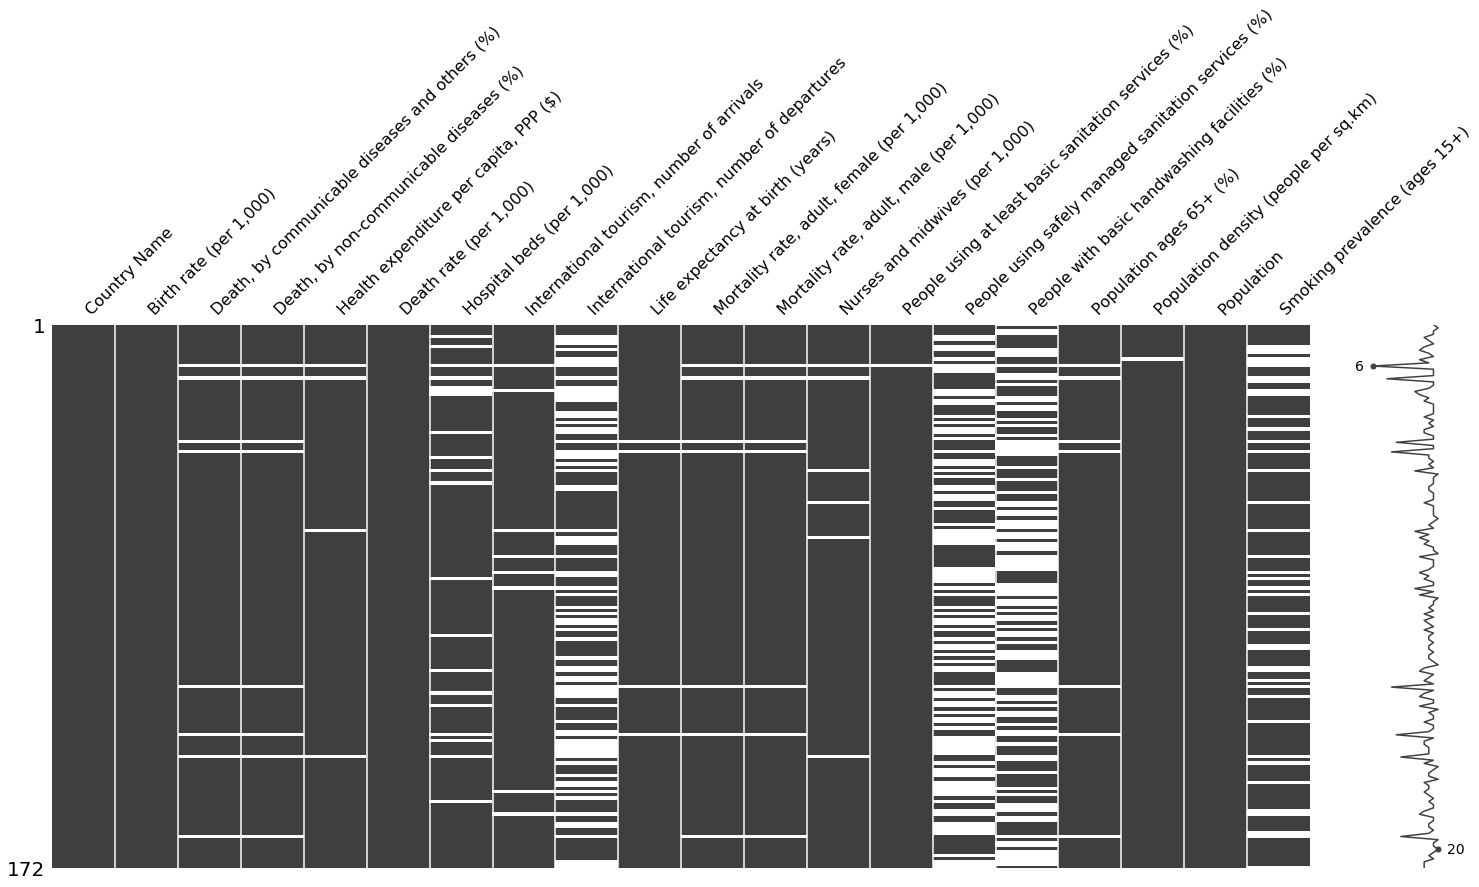

In [21]:
msno.matrix(df_wdi)

In [22]:
math.ceil(len(df_wdi)*0.3)

52

In [23]:
df_wdi.isnull().sum().sort_values()[::-1]

People with basic handwashing facilities (%)           90
People using safely managed sanitation services (%)    87
International tourism, number of departures            73
Smoking prevalence (ages 15+)                          40
Hospital beds (per 1,000)                              20
Death, by communicable diseases and others (%)          8
Death, by non-communicable diseases (%)                 8
International tourism, number of arrivals               8
Population ages 65+ (%)                                 7
Mortality rate, adult, male (per 1,000)                 7
Mortality rate, adult, female (per 1,000)               7
Nurses and midwives (per 1,000)                         6
Health expenditure per capita, PPP ($)                  4
Life expectancy at birth (years)                        4
People using at least basic sanitation services (%)     1
Population density (people per sq.km)                   1
Death rate (per 1,000)                                  0
Population    

In [24]:
df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]

Index(['Country Name', 'Birth rate (per 1,000)',
       'Death, by communicable diseases and others (%)',
       'Death, by non-communicable diseases (%)',
       'Health expenditure per capita, PPP ($)', 'Death rate (per 1,000)',
       'Hospital beds (per 1,000)',
       'International tourism, number of arrivals',
       'Life expectancy at birth (years)',
       'Mortality rate, adult, female (per 1,000)',
       'Mortality rate, adult, male (per 1,000)',
       'Nurses and midwives (per 1,000)',
       'People using at least basic sanitation services (%)',
       'Population ages 65+ (%)', 'Population density (people per sq.km)',
       'Population', 'Smoking prevalence (ages 15+)'],
      dtype='object')

In [25]:
df_wdi = df_wdi[df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]].reindex()

In [26]:
plt.rcParams['figure.figsize'] = 11,11

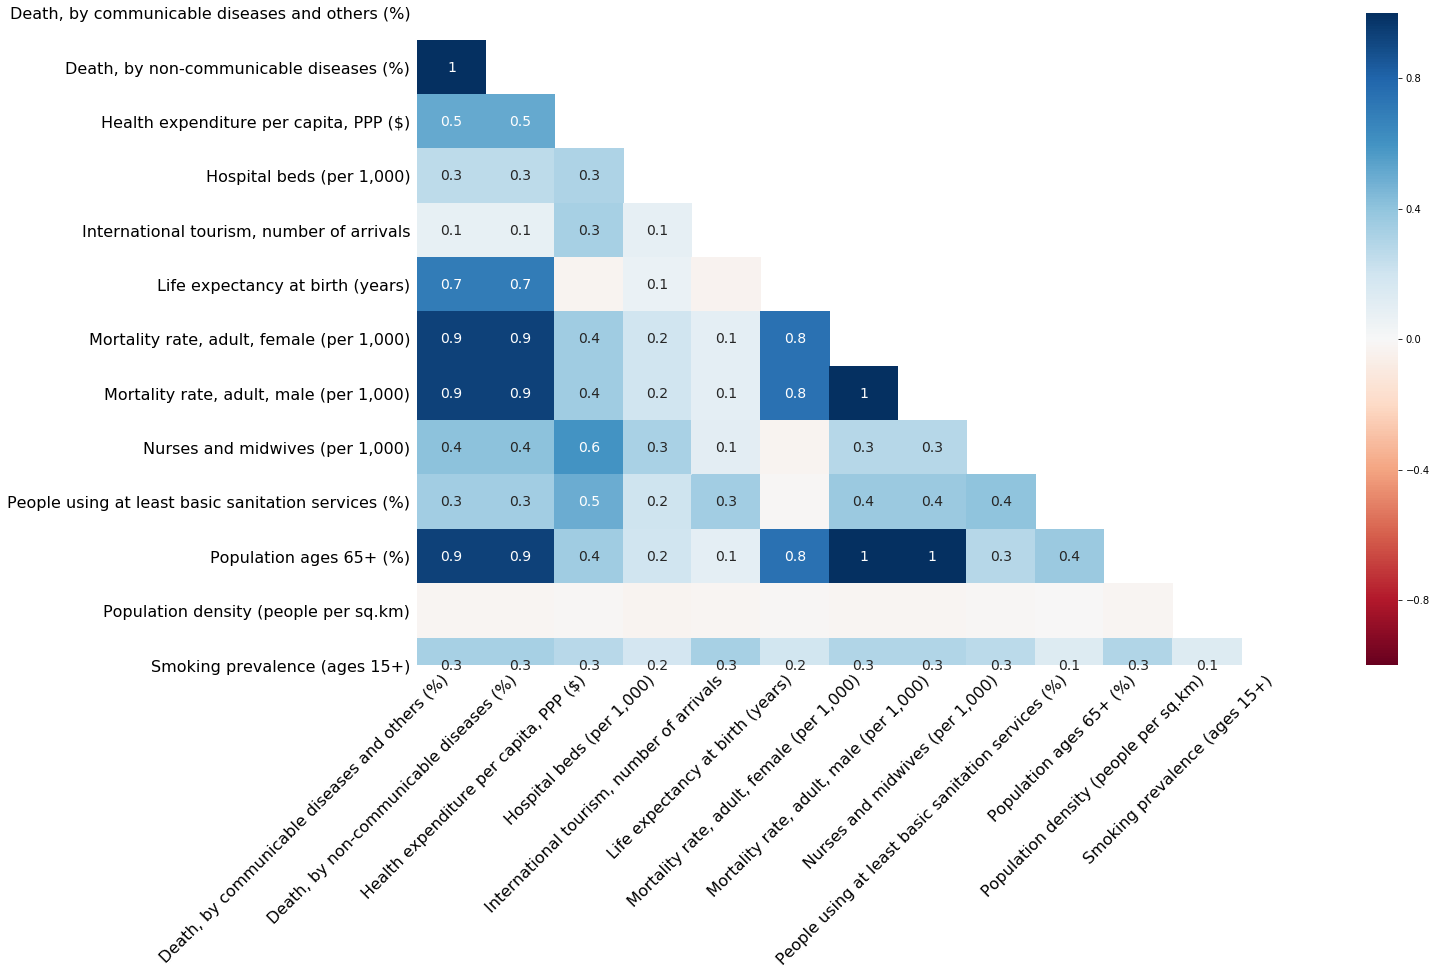

In [27]:
msno.heatmap(df_wdi)

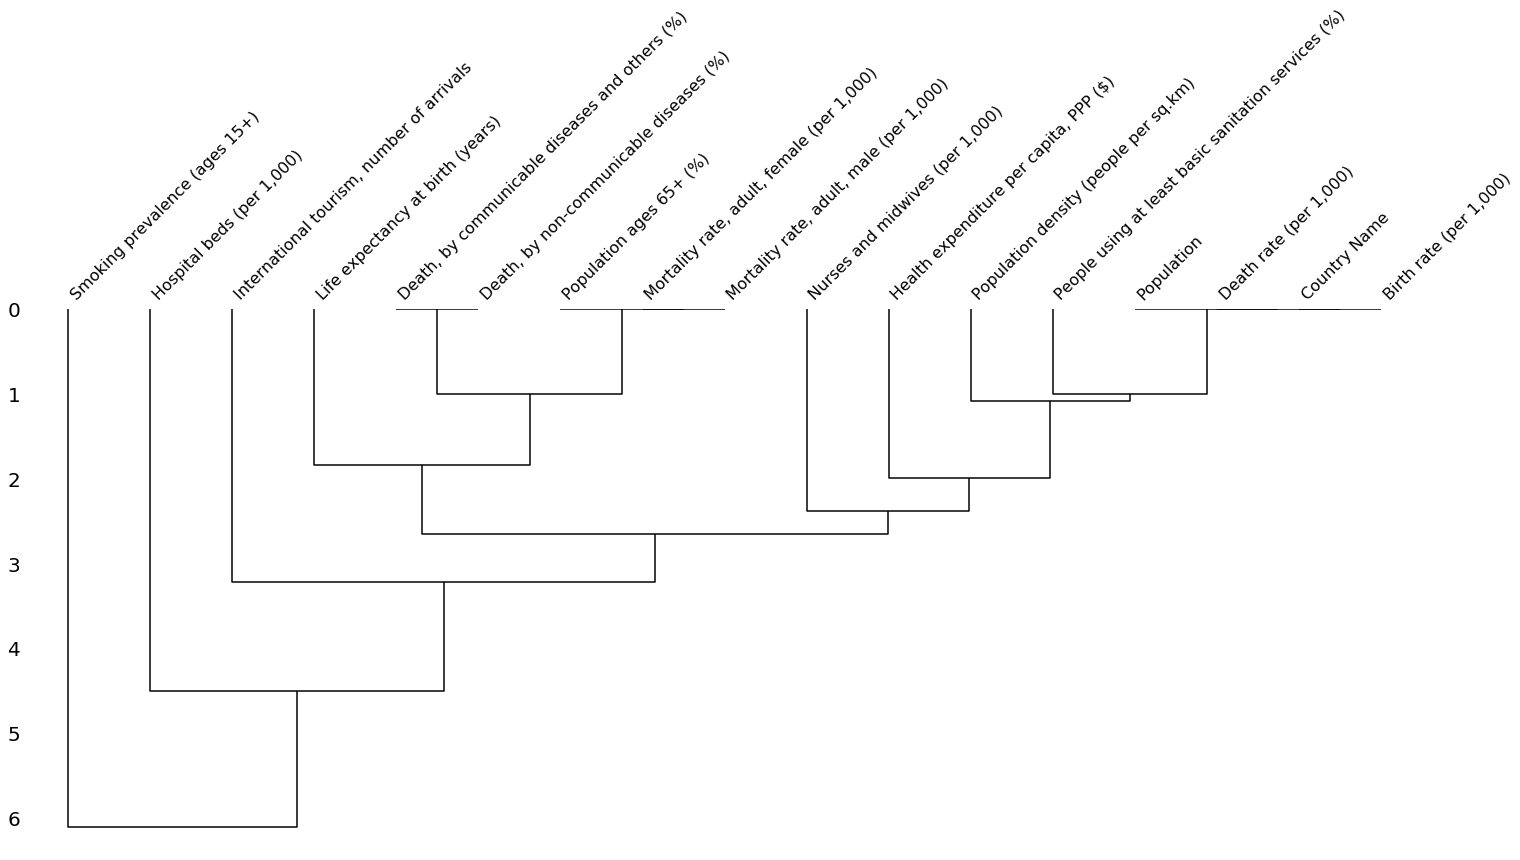

In [28]:
msno.dendrogram(df_wdi)

In [29]:
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
imp = imputer.fit_transform(df_wdi.drop(['Country Name'], 1))

In [30]:
len(imp[0])

16

In [31]:
df_wdi[df_wdi.columns[1:]] = imp
# df_wdi[df_wdi.columns[1:]]

In [32]:
df_wdi

,Country Name,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)","Mortality rate, adult, male (per 1,000)","Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+)
0,Hungary,9.700,1.8,93.8,1963.162630,13.500,7.000000,17552000.0,76.063415,80.586,168.058,6.6425,97.990873,19.157725,107.906606,9768785.0,30.600000
1,Colombia,15.098,10.1,74.8,829.802922,5.503,1.500000,3904000.0,76.925000,87.205,187.406,1.2627,89.625358,8.478047,44.748702,49648685.0,9.000000
2,Germany,9.500,4.8,91.2,5463.330652,11.300,8.300000,38881000.0,80.990244,50.173,92.460,13.1967,99.225038,21.461962,237.370970,82927922.0,30.600000
3,Slovenia,9.800,5.0,88.4,2772.229776,9.900,4.600000,4425000.0,81.175610,43.961,94.604,9.6800,99.109568,19.606880,102.639860,2067372.0,22.500000
4,Rwanda,32.062,42.4,44.0,130.380629,5.308,0.661133,932000.0,68.341000,164.756,219.354,0.8307,66.573842,2.938196,498.659870,12301939.0,12.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Uruguay,13.963,7.6,84.9,1958.900218,9.461,2.800000,3469000.0,77.632000,75.028,131.872,1.9299,96.596192,14.814520,19.708028,3449299.0,16.800000
168,"Korea, South",7.000,10.1,79.8,2711.738257,5.600,11.500000,15347000.0,82.626829,32.920,80.514,6.9735,100.000000,14.418556,529.652104,51635256.0,23.300000
169,Montenegro,11.775,1.4,95.0,1333.929900,10.592,4.000000,2077000.0,76.667000,66.918,126.819,5.7179,97.773878,14.974937,46.271004,622345.0,45.900000
170,Botswana,25.396,46.0,45.7,931.304714,5.834,1.800000,1623000.0,68.812000,163.438,250.771,3.3004,77.269225,4.223874,3.977425,2254126.0,20.000000


In [33]:
temp = df_covid[df_covid['Date'] == max(df_covid['Date'].values)][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

In [34]:
master_df = df_wdi.rename(columns = {'Country Name':'Country/Region'}).merge(temp, on='Country/Region')

In [35]:
master_df['Active'] = master_df['Confirmed'] - (master_df['Recovered'] + master_df['Deaths'])

In [36]:
master_df.head()

,Country/Region,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)",...,"Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+),Confirmed,Deaths,Recovered,Active
0,Hungary,9.700,1.8,93.8,1963.162630,13.500,7.000000,17552000.0,76.063415,80.586,...,6.6425,97.990873,19.157725,107.906606,9768785.0,30.6,1512,122,122,1268
1,Colombia,15.098,10.1,74.8,829.802922,5.503,1.500000,3904000.0,76.925000,87.205,...,1.2627,89.625358,8.478047,44.748702,49648685.0,9.0,2979,127,354,2498
2,Germany,9.500,4.8,91.2,5463.330652,11.300,8.300000,38881000.0,80.990244,50.173,...,13.1967,99.225038,21.461962,237.370970,82927922.0,30.6,131359,3294,68200,59865
3,Slovenia,9.800,5.0,88.4,2772.229776,9.900,4.600000,4425000.0,81.175610,43.961,...,9.6800,99.109568,19.606880,102.639860,2067372.0,22.5,1220,56,152,1012
4,Rwanda,32.062,42.4,44.0,130.380629,5.308,0.661133,932000.0,68.341000,164.756,...,0.8307,66.573842,2.938196,498.659870,12301939.0,12.3,134,0,49,85


In [37]:
plt.rcParams['figure.figsize'] = 11,11

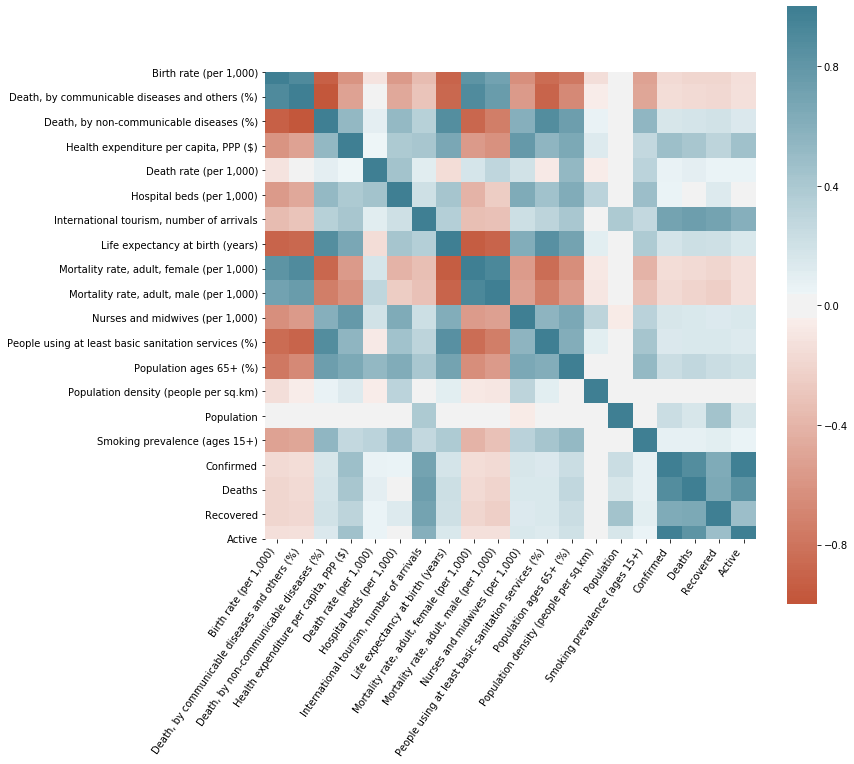

In [38]:
corr = master_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=55,
    horizontalalignment='right'
);

In [39]:
# corr['Confirmed'].sort_values()
corr['Deaths'].sort_values()

Mortality rate, adult, male (per 1,000)               -0.206436
Birth rate (per 1,000)                                -0.188671
Mortality rate, adult, female (per 1,000)             -0.171235
Death, by communicable diseases and others (%)        -0.160821
Population density (people per sq.km)                 -0.022650
Hospital beds (per 1,000)                              0.029536
Smoking prevalence (ages 15+)                          0.083856
Death rate (per 1,000)                                 0.094185
Nurses and midwives (per 1,000)                        0.149523
People using at least basic sanitation services (%)    0.154870
Population                                             0.170143
Death, by non-communicable diseases (%)                0.182025
Life expectancy at birth (years)                       0.219575
Population ages 65+ (%)                                0.284503
Health expenditure per capita, PPP ($)                 0.424737
Recovered                               

In [40]:
df_wdi.to_csv('datasets/world_development_index_clean.csv', index=False)